In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

np.random.seed(42)

# --- 1.a Data Generation ---
#### Sample 1: Groups with equal variance and close means

In [2]:
mu1_group1_s1 = 0
mu1_group2_s1 = 0.5
mu1_group3_s1 = -0.3
sigma1_true = 2 # True standard deviation for known variance test

n_s1 = 200 # Number of samples per group

group1_s1 = np.random.normal(mu1_group1_s1, sigma1_true, n_s1)
group2_s1 = np.random.normal(mu1_group2_s1, sigma1_true, n_s1)
group3_s1 = np.random.normal(mu1_group3_s1, sigma1_true, n_s1)

sample1_data = {
    'Group 1': group1_s1,
    'Group 2': group2_s1,
    'Group 3': group3_s1
}

print("Sample 1 Group Means:")
for name, data in sample1_data.items():
    print(f"{name}: {np.mean(data):.2f}")


Sample 1 Group Means:
Group 1: -0.08
Group 2: 0.67
Group 3: -0.47


#### Sample 2: Groups with equal variance and noticeably different means

In [ ]:
mu2_group1_s2 = 0
mu2_group2_s2 = 5
mu2_group3_s2 = -4
sigma2_true = 2 # True standard deviation for known variance test

n_s2 = 200 # Number of samples per group

group1_s2 = np.random.normal(mu2_group1_s2, sigma2_true, n_s2)
group2_s2 = np.random.normal(mu2_group2_s2, sigma2_true, n_s2)
group3_s2 = np.random.normal(mu2_group3_s2, sigma2_true, n_s2)

sample2_data = {
    'Group 1': group1_s2,
    'Group 2': group2_s2,
    'Group 3': group3_s2
}
print("\nSample 2 Group Means:")
for name, data in sample2_data.items():
    print(f"{name}: {np.mean(data):.2f}")


Sample 2 Group Means:
Group 1: 0.02
Group 2: 5.26
Group 3: -3.73


### --- 1.b Data Visualization (KDE) ---

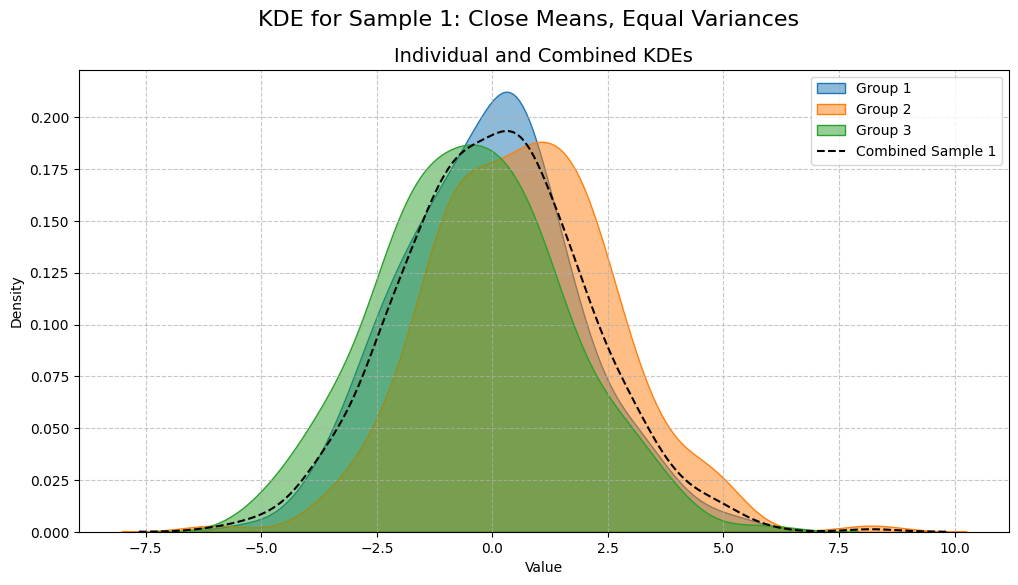

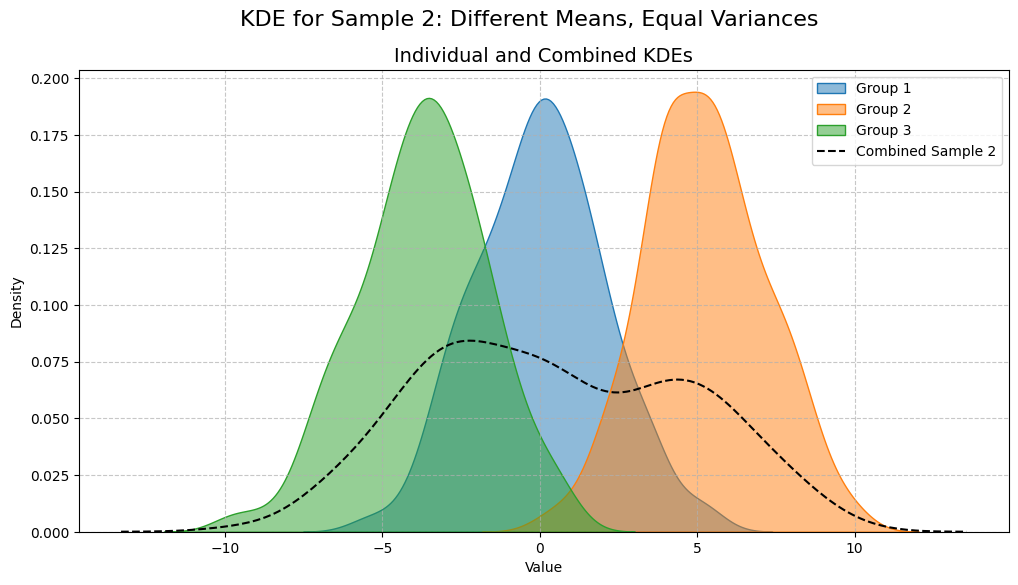

In [ ]:

# Plotting Sample 1
plt.figure(figsize=(12, 6))
plt.suptitle('KDE for Sample 1: Close Means, Equal Variances', fontsize=16)

# KDE for individual groups
for name, data in sample1_data.items():
    sns.kdeplot(data, label=name, fill=True, alpha=0.5)

# KDE for combined groups
combined_sample1 = np.concatenate(list(sample1_data.values()))
sns.kdeplot(combined_sample1, label='Combined Sample 1', linestyle='--', color='black')

plt.title('Individual and Combined KDEs', fontsize=14)
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Plotting Sample 2
plt.figure(figsize=(12, 6))
plt.suptitle('KDE for Sample 2: Different Means, Equal Variances', fontsize=16)

# KDE for individual groups
for name, data in sample2_data.items():
    sns.kdeplot(data, label=name, fill=True, alpha=0.5)

# KDE for combined groups
combined_sample2 = np.concatenate(list(sample2_data.values()))
sns.kdeplot(combined_sample2, label='Combined Sample 2', linestyle='--', color='black')

plt.title('Individual and Combined KDEs', fontsize=14)
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



### --- 2.a Realize paired test for known variances (Z-test) ---

In [ ]:
def z_test_known_variance(data1, data2, sigma1_known, sigma2_known, alpha=0.05):
    """
    Performs a two-sample Z-test for means with known population variances.

    Args:
        data1 (np.array): First sample data.
        data2 (np.array): Second sample data.
        sigma1_known (float): Known population standard deviation of data1.
        sigma2_known (float): Known population standard deviation of data2.
        alpha (float): Significance level.

    Returns:
        dict: A dictionary containing test results (Z-statistic, p-value, critical value, hypothesis rejection).
    """
    n1 = len(data1)
    n2 = len(data2)
    mean1 = np.mean(data1)
    mean2 = np.mean(data2)

    # Calculate Z-statistic
    se = np.sqrt((sigma1_known**2 / n1) + (sigma2_known**2 / n2))
    z_statistic = (mean1 - mean2) / se

    # Calculate p-value (two-tailed)
    p_value = 2 * (1 - stats.norm.cdf(abs(z_statistic)))

    # Get critical value for two-tailed test
    critical_value = stats.norm.ppf(1 - alpha / 2)

    reject_h0 = abs(z_statistic) > critical_value

    return {
        'Z-statistic': z_statistic,
        'P-value': p_value,
        'Critical Z': critical_value,
        'Reject H0': reject_h0
    }

### --- 2.b Realize paired test for unknown but equal variances (Pooled t-test) ---

In [ ]:
def pooled_t_test(data1, data2, alpha=0.05):
    """
    Performs a two-sample t-test for means with unknown but equal population variances (pooled t-test).

    Args:
        data1 (np.array): First sample data.
        data2 (np.array): Second sample data.
        alpha (float): Significance level.

    Returns:
        dict: A dictionary containing test results (t-statistic, p-value, critical value, hypothesis rejection).
    """
    n1 = len(data1)
    n2 = len(data2)
    mean1 = np.mean(data1)
    mean2 = np.mean(data2)
    var1 = np.var(data1, ddof=1) # Sample variance (ddof=1 for unbiased estimate)
    var2 = np.var(data2, ddof=1)

    # Calculate pooled variance
    pooled_var = ((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2)

    # Calculate t-statistic
    se = np.sqrt(pooled_var * (1/n1 + 1/n2))
    t_statistic = (mean1 - mean2) / se

    # Degrees of freedom
    df = n1 + n2 - 2

    # Calculate p-value (two-tailed)
    p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df))

    # Get critical value for two-tailed test
    critical_value = stats.t.ppf(1 - alpha / 2, df)

    reject_h0 = abs(t_statistic) > critical_value

    return {
        't-statistic': t_statistic,
        'P-value': p_value,
        'Degrees of Freedom': df,
        'Critical t': critical_value,
        'Reject H0': reject_h0
    }


### --- 2.c Apply both tests for all pairs of groups for each sample ---

In [ ]:

alpha_level = 0.05 # Significance level

# Define pairs for testing
group_names = ['Group 1', 'Group 2', 'Group 3']
pairs = [('Group 1', 'Group 2'), ('Group 1', 'Group 3'), ('Group 2', 'Group 3')]

print("\n--- Applying Z-test (Known Variances) ---")
print("Assumed true standard deviation for Sample 1:", sigma1_true)
print("Assumed true standard deviation for Sample 2:", sigma2_true)

print("\nResults for Sample 1:")
for g1_name, g2_name in pairs:
    data1 = sample1_data[g1_name]
    data2 = sample1_data[g2_name]
    results = z_test_known_variance(data1, data2, sigma1_true, sigma1_true, alpha=alpha_level)
    print(f"  Comparing {g1_name} and {g2_name}:")
    print(f"    Z-statistic: {results['Z-statistic']:.3f}, P-value: {results['P-value']:.3f}, Reject H0: {results['Reject H0']}")

print("\nResults for Sample 2:")
for g1_name, g2_name in pairs:
    data1 = sample2_data[g1_name]
    data2 = sample2_data[g2_name]
    results = z_test_known_variance(data1, data2, sigma2_true, sigma2_true, alpha=alpha_level)
    print(f"  Comparing {g1_name} and {g2_name}:")
    print(f"    Z-statistic: {results['Z-statistic']:.3f}, P-value: {results['P-value']:.3f}, Reject H0: {results['Reject H0']}")

print("\n--- Applying Pooled t-test (Unknown but Equal Variances) ---")

print("\nResults for Sample 1:")
for g1_name, g2_name in pairs:
    data1 = sample1_data[g1_name]
    data2 = sample1_data[g2_name]
    results = pooled_t_test(data1, data2, alpha=alpha_level)
    print(f"  Comparing {g1_name} and {g2_name}:")
    print(f"    t-statistic: {results['t-statistic']:.3f}, P-value: {results['P-value']:.3f}, Reject H0: {results['Reject H0']}")

print("\nResults for Sample 2:")
for g1_name, g2_name in pairs:
    data1 = sample2_data[g1_name]
    data2 = sample2_data[g2_name]
    results = pooled_t_test(data1, data2, alpha=alpha_level)
    print(f"  Comparing {g1_name} and {g2_name}:")
    print(f"    t-statistic: {results['t-statistic']:.3f}, P-value: {results['P-value']:.3f}, Reject H0: {results['Reject H0']}")


--- Applying Z-test (Known Variances) ---
Assumed true standard deviation for Sample 1: 2
Assumed true standard deviation for Sample 2: 2

Results for Sample 1:
  Comparing Group 1 and Group 2:
    Z-statistic: -3.766, P-value: 0.000, Reject H0: True
  Comparing Group 1 and Group 3:
    Z-statistic: 1.949, P-value: 0.051, Reject H0: False
  Comparing Group 2 and Group 3:
    Z-statistic: 5.715, P-value: 0.000, Reject H0: True

Results for Sample 2:
  Comparing Group 1 and Group 2:
    Z-statistic: -26.193, P-value: 0.000, Reject H0: True
  Comparing Group 1 and Group 3:
    Z-statistic: 18.753, P-value: 0.000, Reject H0: True
  Comparing Group 2 and Group 3:
    Z-statistic: 44.946, P-value: 0.000, Reject H0: True

--- Applying Pooled t-test (Unknown but Equal Variances) ---

Results for Sample 1:
  Comparing Group 1 and Group 2:
    t-statistic: -3.926, P-value: 0.000, Reject H0: True
  Comparing Group 1 and Group 3:
    t-statistic: 2.024, P-value: 0.044, Reject H0: True
  Comparing

## --- 3.a Perform One-Way ANOVA and F-test ---

In [8]:

def calculate_one_way_anova_f_statistic(*groups):
    """
    Calculates the F-statistic for a one-way ANOVA.

    Args:
        *groups: Variable number of numpy arrays, each representing a group's data.

    Returns:
        float: The calculated F-statistic.
    """
    k = len(groups) # Number of groups
    n_values = [len(group) for group in groups] # Number of samples in each group
    N = sum(n_values) # Total number of observations

    # Calculate overall mean
    all_data = np.concatenate(groups)
    overall_mean = np.mean(all_data)

    # Calculate Sum of Squares Between (SS_between)
    ss_between = 0
    for i in range(k):
        group_mean = np.mean(groups[i])
        ss_between += n_values[i] * (group_mean - overall_mean)**2

    # Calculate Sum of Squares Within (SS_within)
    ss_within = 0
    for i in range(k):
        group_mean = np.mean(groups[i])
        ss_within += np.sum((groups[i] - group_mean)**2)

    # Calculate degrees of freedom
    df_between = k - 1
    df_within = N - k

    # Calculate Mean Squares
    ms_between = ss_between / df_between
    ms_within = ss_within / df_within

    # Calculate F-statistic
    f_statistic = ms_between / ms_within

    return f_statistic, df_between, df_within

In [9]:
alpha_level = 0.05

print("\n--- Custom F-statistic Calculation vs. SciPy's f_oneway ---")

# Sample 1
f_custom_s1, df_between_s1, df_within_s1 = calculate_one_way_anova_f_statistic(
    sample1_data['Group 1'],
    sample1_data['Group 2'],
    sample1_data['Group 3']
)
f_scipy_s1, p_scipy_s1 = stats.f_oneway(
    sample1_data['Group 1'],
    sample1_data['Group 2'],
    sample1_data['Group 3']
)

print("\nSample 1 (Close Means):")
print(f"  Custom F-statistic: {f_custom_s1:.3f}")
print(f"  SciPy F-statistic:  {f_scipy_s1:.3f}")
print(f"  SciPy P-value:      {p_scipy_s1:.3f}")
if p_scipy_s1 < alpha_level:
    print(f"  SciPy Reject H0: Yes (P-value < {alpha_level})")
else:
    print(f"  SciPy Reject H0: No (P-value >= {alpha_level})")


# Sample 2
f_custom_s2, df_between_s2, df_within_s2 = calculate_one_way_anova_f_statistic(
    sample2_data['Group 1'],
    sample2_data['Group 2'],
    sample2_data['Group 3']
)
f_scipy_s2, p_scipy_s2 = stats.f_oneway(
    sample2_data['Group 1'],
    sample2_data['Group 2'],
    sample2_data['Group 3']
)

print("\nSample 2 (Different Means):")
print(f"  Custom F-statistic: {f_custom_s2:.3f}")
print(f"  SciPy F-statistic:  {f_scipy_s2:.3f}")
print(f"  SciPy P-value:      {p_scipy_s2:.3f}")
if p_scipy_s2 < alpha_level:
    print(f"  SciPy Reject H0: Yes (P-value < {alpha_level})")
else:
    print(f"  SciPy Reject H0: No (P-value >= {alpha_level})")


--- Custom F-statistic Calculation vs. SciPy's f_oneway ---

Sample 1 (Close Means):
  Custom F-statistic: 17.903
  SciPy F-statistic:  17.903
  SciPy P-value:      0.000
  SciPy Reject H0: Yes (P-value < 0.05)

Sample 2 (Different Means):
  Custom F-statistic: 1014.265
  SciPy F-statistic:  1014.265
  SciPy P-value:      0.000
  SciPy Reject H0: Yes (P-value < 0.05)


In [ ]:
alpha_level = 0.05 # Significance level

print("\n--- Performing One-Way ANOVA ---")

# ANOVA for Sample 1
f_statistic_s1, p_value_s1 = stats.f_oneway(
    sample1_data['Group 1'],
    sample1_data['Group 2'],
    sample1_data['Group 3']
)

print("\nResults for Sample 1 (Close Means):")
print(f"  F-statistic: {f_statistic_s1:.3f}")
print(f"  P-value: {p_value_s1:.3f}")
if p_value_s1 < alpha_level:
    print(f"  Reject H0: Yes (P-value < {alpha_level}). At least one group mean is significantly different.")
else:
    print(f"  Reject H0: No (P-value >= {alpha_level}). No significant difference found between group means.")

# ANOVA for Sample 2
f_statistic_s2, p_value_s2 = stats.f_oneway(
    sample2_data['Group 1'],
    sample2_data['Group 2'],
    sample2_data['Group 3']
)

print("\nResults for Sample 2 (Different Means):")
print(f"  F-statistic: {f_statistic_s2:.3f}")
print(f"  P-value: {p_value_s2:.3f}")
if p_value_s2 < alpha_level:
    print(f"  Reject H0: Yes (P-value < {alpha_level}). At least one group mean is significantly different.")
else:
    print(f"  Reject H0: No (P-value >= {alpha_level}). No significant difference found between group means.")



--- Performing One-Way ANOVA ---

Results for Sample 1 (Close Means):
  F-statistic: 17.903
  P-value: 0.000
  Reject H0: Yes (P-value < 0.05). At least one group mean is significantly different.

Results for Sample 2 (Different Means):
  F-statistic: 1014.265
  P-value: 0.000
  Reject H0: Yes (P-value < 0.05). At least one group mean is significantly different.
